In [1]:
import json
import pandas as pd

In [2]:
json_data = []
with open('cadets.json', 'r') as f:
    for line in f:
        json_data.append(json.loads(line))

In [3]:
# json_data[0]
print(len(json_data))

1


In [4]:
print(type(json_data[0][1]))
for key in json_data[0][0]:
	print(key)

<class 'dict'>
id
email
login
first_name
last_name
usual_full_name
usual_first_name
url
phone
displayname
kind
image
staff?
correction_point
pool_month
pool_year
location
wallet
anonymize_date
data_erasure_date
created_at
updated_at
alumnized_at
alumni?
active?
groups
cursus_users
projects_users
languages_users
achievements
titles
titles_users
partnerships
patroned
patroning
expertises_users
roles
campus
campus_users


In [5]:
keys = ["login", "url", "displayname", "pool_month", "pool_year"]
list1 = [json_data[0][0][key] for key in keys]
print(list1)

['wehuang', 'https://api.intra.42.fr/v2/users/wehuang', 'Weizheng Huang', 'august', '2023']


In [6]:
list_t = json_data[0][0]["cursus_users"][1]
list1.append(list_t["blackholed_at"])
print(list1)
for i in range(0, len(list1)):
	print(type(list1[i]))

['wehuang', 'https://api.intra.42.fr/v2/users/wehuang', 'Weizheng Huang', 'august', '2023', '2024-02-18T02:00:00.000Z']
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [7]:
def make_data(json_list: list, now: int) -> pd.DataFrame:
	data = {"Name": [], "Full_Name": [], "Level": [],
			"batch_month": [], "batch_year": [], 
			"blackhole_date": []}#, "days_before_blackhole": []}
	for i in range(0, len(json_list[0])):
		data["Name"].append(json_list[0][i]["login"])
		data["Full_Name"].append(json_list[0][i]["displayname"])
		data["batch_month"].append(json_list[0][i]["pool_month"])
		data["batch_year"].append(json_list[0][i]["pool_year"])
		data["Level"].append(json_list[0][i]["cursus_users"][1]["level"])
		data["blackhole_date"].append(json_list[0][i]["cursus_users"][1]["blackholed_at"])
	return (pd.DataFrame(data))

In [8]:
df = make_data(json_data, 5)
df.head()

,Name,Full_Name,Level,batch_month,batch_year,blackhole_date
0,wehuang,Weizheng Huang,0.61,august,2023,2024-02-18T02:00:00.000Z
1,rteoh,Ryan Teoh,0.00,august,2023,2024-01-01T02:00:00.000Z
2,ychai,Yong Kang Chai,0.00,august,2023,2024-01-01T02:00:00.000Z
3,tjun-yu,Tan Jun Yu,0.00,august,2023,2024-01-01T02:00:00.000Z
4,kiloh,Kian Feng Loh,0.00,august,2023,2024-01-01T02:00:00.000Z


In [9]:
from datetime import datetime

def str_date(s: str, format: str) -> datetime:
	if (s == None):
		return (None)
	s = s[0: 10]
	print(s)
	return (datetime.strptime(s, format))

In [10]:
now = datetime.now()
print(f"{now = }")

now = datetime.datetime(2023, 10, 7, 18, 6, 51, 564390)


In [11]:
print(len(df['blackhole_date']))
for i in range(0, len(df['blackhole_date']) - 1):
	if (df['blackhole_date'][i] == None):
		print(f"{i = }")
	elif (len(df['blackhole_date'][i]) > 24):
		print('something')
print(df.iloc[214, :])

344
i = 170
i = 214
i = 218
i = 227
i = 237
i = 284
i = 285
i = 287
i = 289
i = 298
i = 299
i = 303
i = 308
i = 330
i = 339
Name                   edlim
Full_Name         Edison Lim
Level                  10.83
batch_month         february
batch_year              2022
blackhole_date          None
Name: 214, dtype: object


In [14]:
print(type(df['blackhole_date'][213]))
print(df['blackhole_date'][213])
t = str_date(df['blackhole_date'][213], "%Y-%m-%d")
print(f"{t = }")

<class 'str'>
2022-10-05T02:00:00.000Z
2022-10-05
t = datetime.datetime(2022, 10, 5, 0, 0)


In [15]:
now = datetime.now()
delta = t - now
print((t - now).days)
print(type(delta.days))

-368
<class 'int'>


In [16]:
from datetime import datetime

def str_date(s: str) -> datetime:
	if (s == None):
		return (None)
	format = "%Y-%m-%d"
	s = s[0: 10]
	return (datetime.strptime(s, format))

In [18]:
def make_data(json_list: list, now: datetime) -> pd.DataFrame:
	data = {"Name": [], "Full_Name": [], "Level": [],
			"batch_month": [], "batch_year": [], 
			"blackhole_date": [], "days_before_blackhole": [], "status": []}
	for i in range(0, len(json_list[0])):
		data["Name"].append(json_list[0][i]["login"])
		data["Full_Name"].append(json_list[0][i]["displayname"])
		data["batch_month"].append(json_list[0][i]["pool_month"])
		data["batch_year"].append(json_list[0][i]["pool_year"])
		data["Level"].append(json_list[0][i]["cursus_users"][1]["level"])
		t = str_date(json_list[0][i]["cursus_users"][1]["blackholed_at"])
		if (t):
			diff = (t - now).days
		else:
			diff = None
		data["blackhole_date"].append(t)
		data["days_before_blackhole"].append(diff)
		grade = json_list[0][i]['cursus_users'][1]['grade']
		if (diff is None and grade in ["Member", "Learner"]):
			data["status"].append("Specialisation")
		elif (diff < 0 and grade not in ["Member", "Learner"]):
			data["status"].append("Dropped out")
		elif (diff > 0 and grade in ["Member", "Learner"]):
			data["status"].append("In Core")
		else:
			data["status"].append("Unknown")
	return (pd.DataFrame(data))

In [19]:
df = make_data(json_data, datetime.now())
df.head()

,Name,Full_Name,Level,batch_month,batch_year,blackhole_date,days_before_blackhole,status
0,wehuang,Weizheng Huang,0.61,august,2023,2024-02-18,133.0,In Core
1,rteoh,Ryan Teoh,0.00,august,2023,2024-01-01,85.0,In Core
2,ychai,Yong Kang Chai,0.00,august,2023,2024-01-01,85.0,In Core
3,tjun-yu,Tan Jun Yu,0.00,august,2023,2024-01-01,85.0,In Core
4,kiloh,Kian Feng Loh,0.00,august,2023,2024-01-01,85.0,In Core


In [ ]:

# import module
import pandas as pd
 
# assign data
dataFrame = pd.DataFrame({'Name': [' RACHEL  ', ' MONICA  ', ' PHOEBE  ',
                                   '  ROSS    ', 'CHANDLER', ' JOEY    '],
                           
                          'Age': [30, 35, 37, 33, 34, 30],
                           
                          'Salary': [100000, 93000, 88000, 120000, 94000, 95000],
                           
                          'JOB': ['DESIGNER', 'CHEF', 'MASUS', 'PALENTOLOGY',
                                  'IT', 'ARTIST']})
# filter dataframe
display(dataFrame.loc[(dataFrame['Salary']>=100000) & (dataFrame['Age']< 40) & (dataFrame['JOB'].str.startswith('D')),
                    ['Name','JOB']])

(array([3., 1., 5.]), array([ 0,  7, 14, 30]), <a list of 3 Patch objects>)

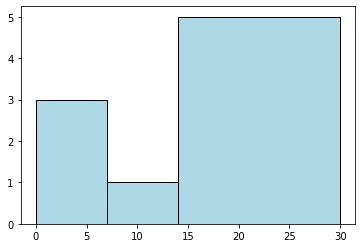

In [43]:
from matplotlib import pyplot as plt

# try to filter ppl from batch 2020 august and those how are 
# 0-14, 14-30, 30+

bins = [0, 7, 14, 30]
temp = df.loc[(df['batch_month'] == "august" ) & (df['batch_year'] == "2022") & (df['days_before_blackhole'] > 0)]
temp.head()
# color_list=['black', 'red', 'green', 'blue', 'cyan']
# colours = []
# l = len(color_list)
# k = 0
# for i in range(0, len(bins)):
# 	colours.append(color_list[i - k])
# 	if (i == l - 1):
# 		k += 5
# print(colours)
plt.hist(temp['days_before_blackhole'], bins=bins, color="lightblue", edgecolor='black')